# `IMPORT LIBRARIES`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot



In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# `IMPORT DATASET`

In [3]:
power = pd.read_csv("Regrerssion_energy_production_data.csv", sep = ";")

In [4]:
power.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


# `EDA`

In [5]:
power.shape

(9568, 5)

In [6]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


no null values in any columns

In [7]:
power.duplicated().sum()

41

 41 duplicate instances

In [8]:
df =  power.copy()

In [9]:
# df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

41

duplicates have been dropped

In [11]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


after seeing the statisctics we cannot surely tell the distribution and if the outliers are present in the features or not. we will have to explore further

lets plot histogram, boxplot and qq plot of each feature to check its distribution

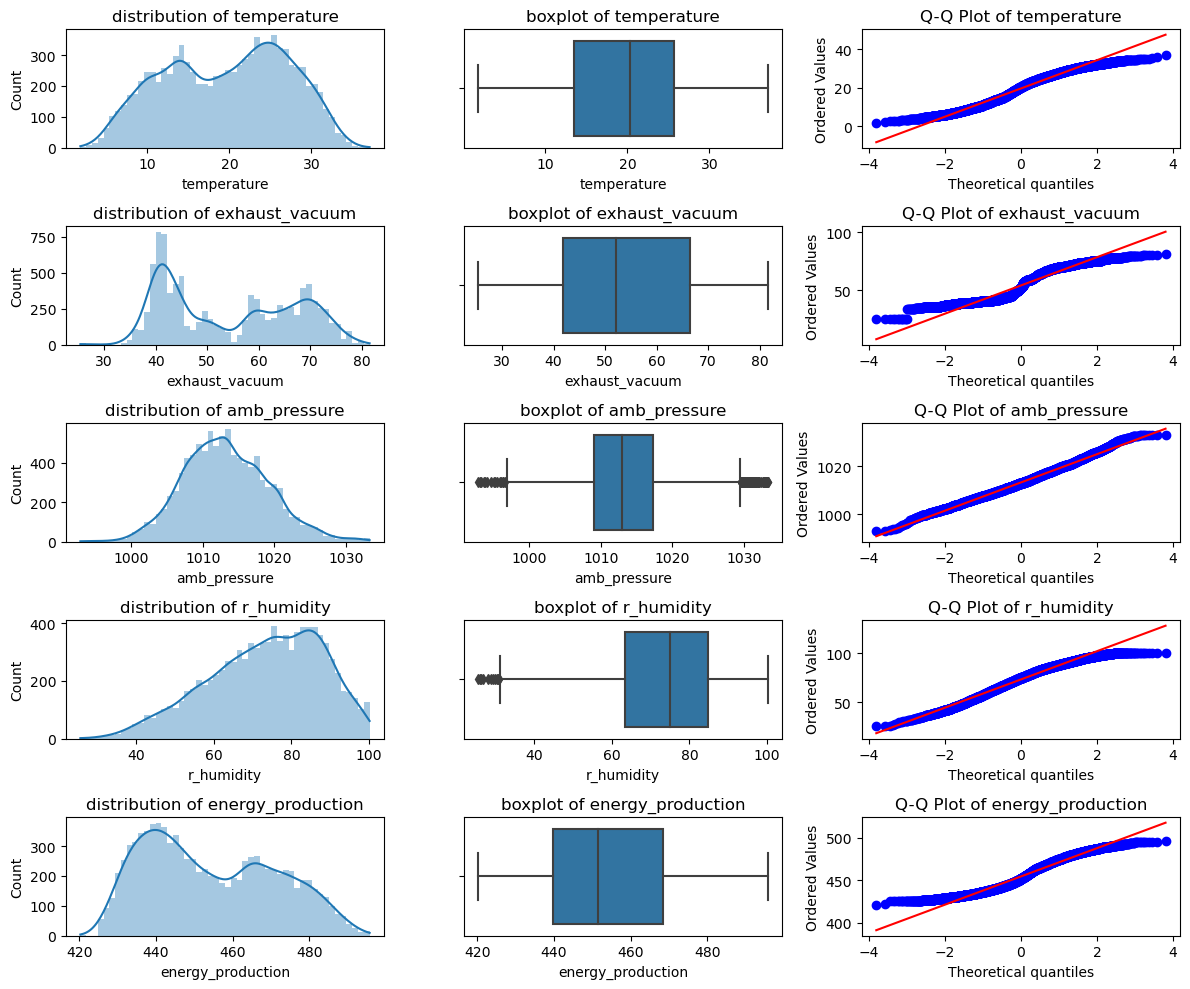

In [12]:
fig , ax = plt.subplots(5,3, figsize=(12,10), sharex =False, sharey =False)
for col_num ,col in enumerate(df.columns):
    sns.histplot( df[col] , ax = ax[col_num , 0], 
                 kde =True , bins = 50, alpha = 0.4, edgecolor = None)
    ax[col_num, 0].set_title(f"distribution of {col}")
    
    sns.boxplot(x = df[col] , ax = ax[col_num , 1])
    ax[col_num, 1].set_title(f"boxplot of {col}")
    
    probplot(df[col], plot=ax[col_num, 2], fit=True)
    ax[col_num, 2].set_title(f"Q-Q Plot of {col}")

plt.tight_layout()

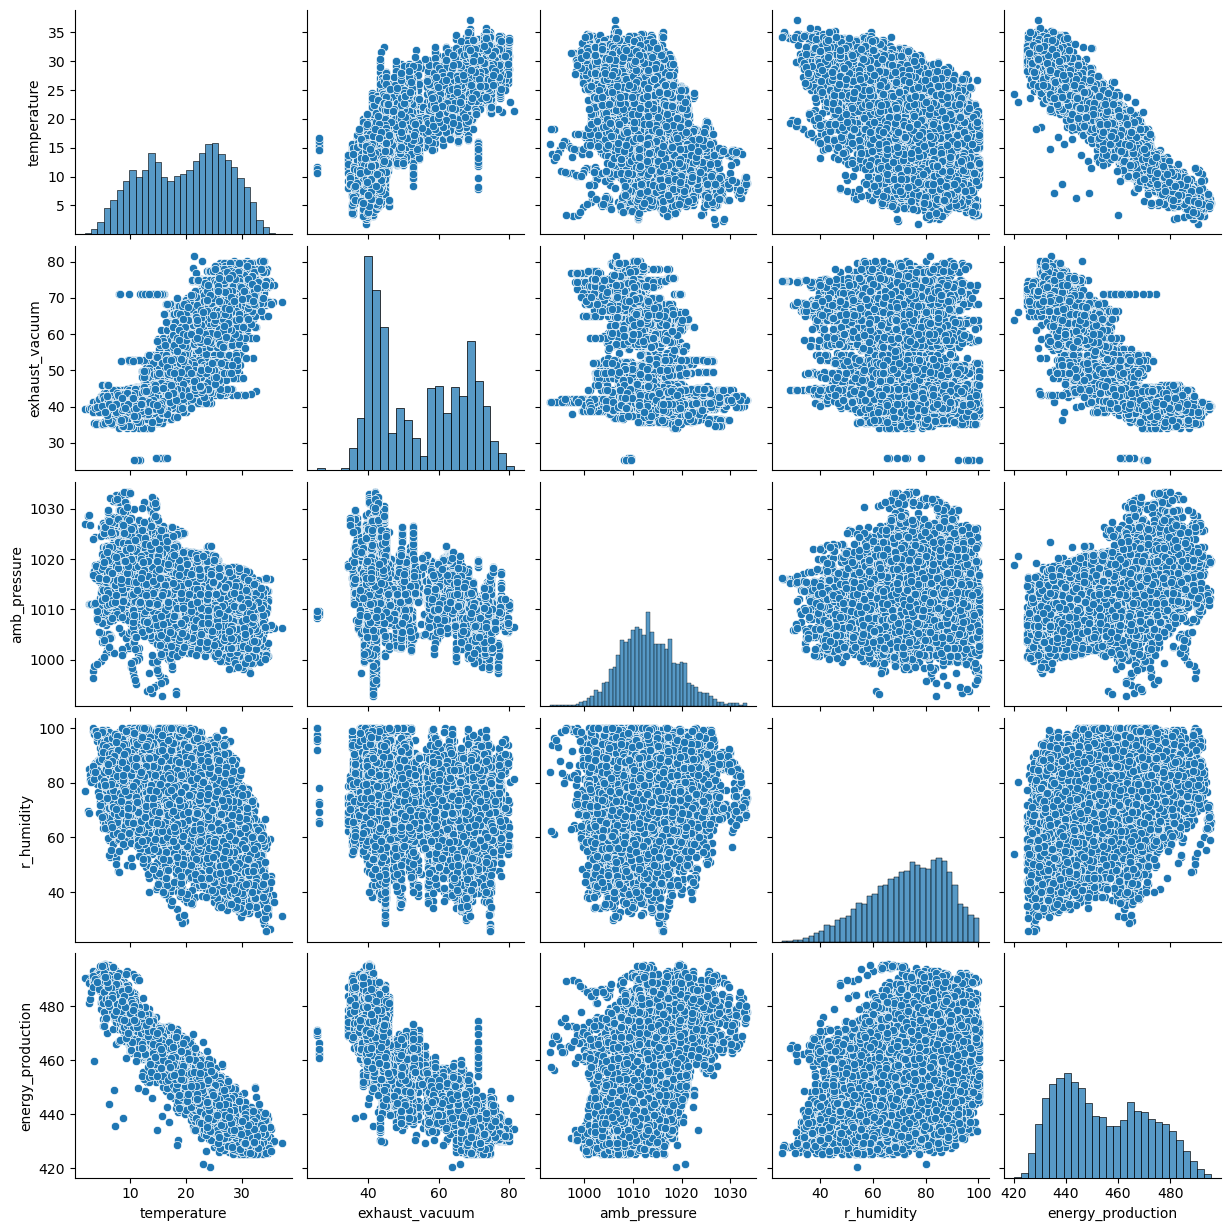

In [13]:
sns.pairplot(df, palette=["#9BAFB9"])

<Axes: >

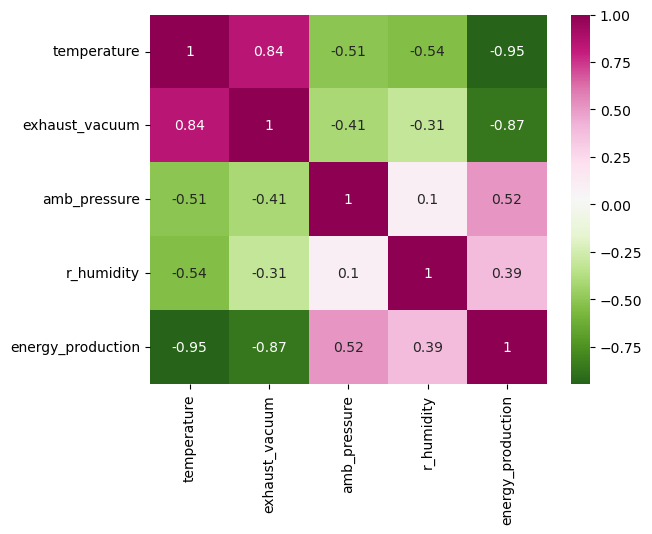

In [14]:
sns.heatmap(df.corr(), annot=True, cmap ='PiYG_r')

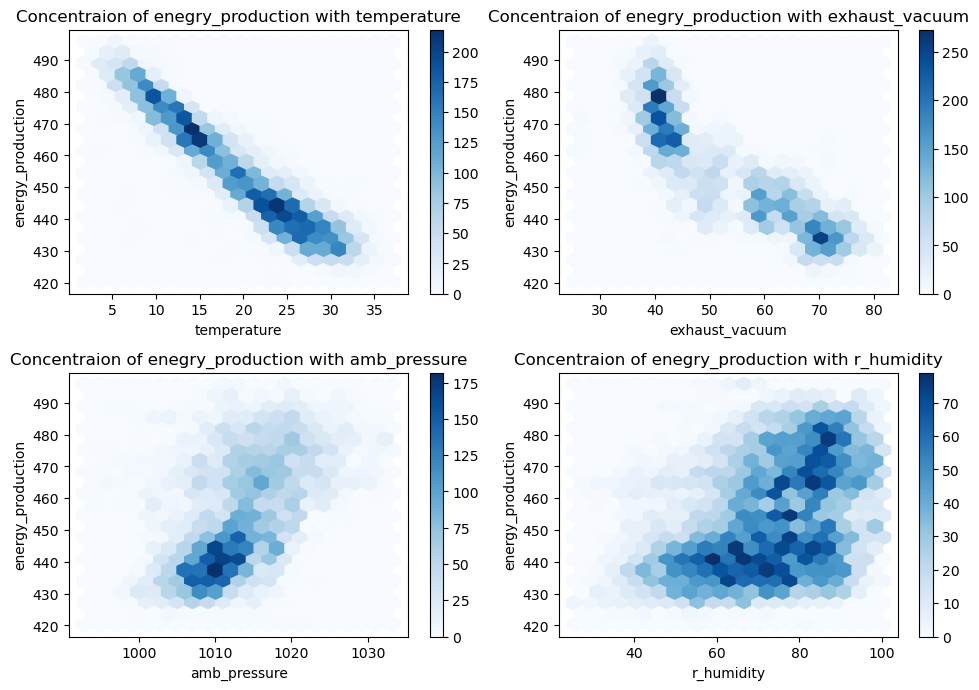

In [15]:
plt.figure(figsize =(10,10)) 
for j,i in enumerate(df.columns[:-1]):
    plt.subplot(3,2,j+1)
    hb = plt.hexbin(df[i], df['energy_production'], gridsize=20,cmap='Blues')
    cb = plt.colorbar(hb)   
    plt.xlabel(i)
    plt.ylabel('energy_production')
    plt.title(f"Concentraion of enegry_production with {i}")
plt.tight_layout()

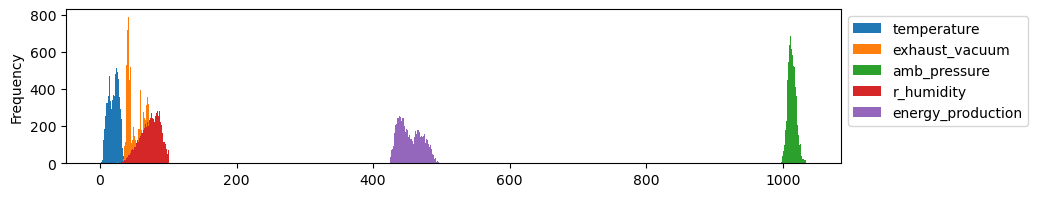

In [16]:
df.plot(kind ="hist", bins = 1000, figsize= (10,2), alpha =1 )
plt.legend(bbox_to_anchor = (1,1), loc="upper left")

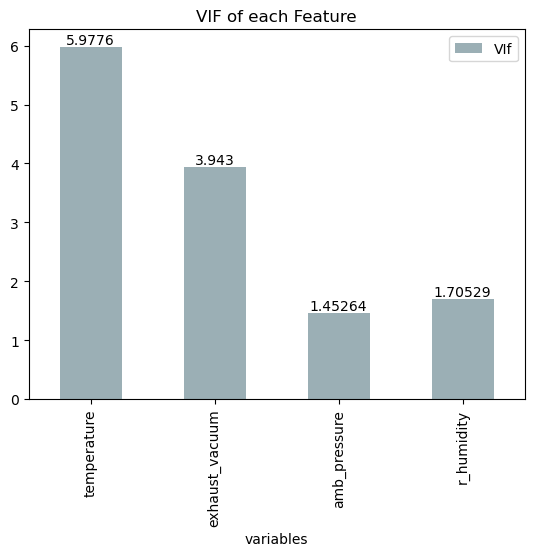

In [17]:
import  statsmodels.formula.api as smf
r2_temp = smf.ols("temperature~ exhaust_vacuum+amb_pressure+r_humidity", df ).fit().rsquared
vif_temp = 1/(1-r2_temp) 

r2_ex_vac = smf.ols("exhaust_vacuum~ temperature+r_humidity+amb_pressure", df ).fit().rsquared
vif_ex_vac = 1/(1-r2_ex_vac) 

r2_amb_pres = smf.ols("amb_pressure~ temperature+exhaust_vacuum+r_humidity", df ).fit().rsquared
vif_amb_pres = 1/(1-r2_amb_pres) 

r2_r_hum = smf.ols("r_humidity~ temperature+exhaust_vacuum+amb_pressure", df ).fit().rsquared
vif_r_hum = 1/(1-r2_r_hum) 

data = {"variables":["temperature","exhaust_vacuum","amb_pressure","r_humidity"], "VIf":[vif_temp,vif_ex_vac,vif_amb_pres,vif_r_hum]}
vif = pd.DataFrame(data = data).set_index('variables')
ax = vif.plot(kind="bar", color ="#9BAFB5")
plt.title("VIF of each Feature")
for i in ax.containers:
    ax.bar_label(i,)

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [19]:
X1 ,X2, y1,y2 = train_test_split(df.drop("energy_production", axis = 1), df["energy_production"],
                                test_size=0.3, random_state=0)

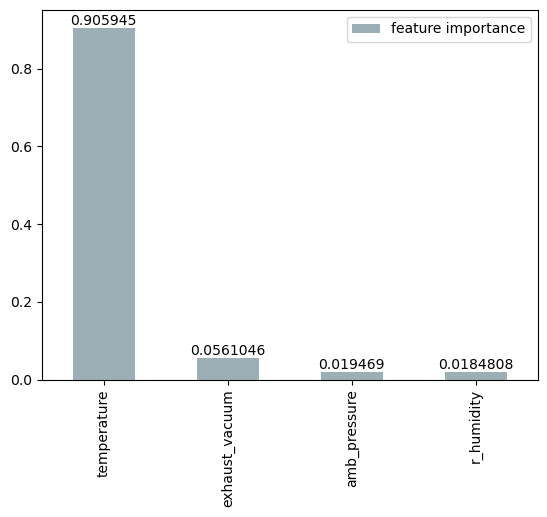

In [20]:
dt = DecisionTreeRegressor()
dt.fit(X1, y1)
ax = pd.DataFrame(dt.feature_importances_,
                           df.columns[:-1]).rename(columns={0:"feature importance"}).plot(kind ="bar",
                                                                                         color='#9BAFB5')

for i in ax.containers:
    ax.bar_label(i,)

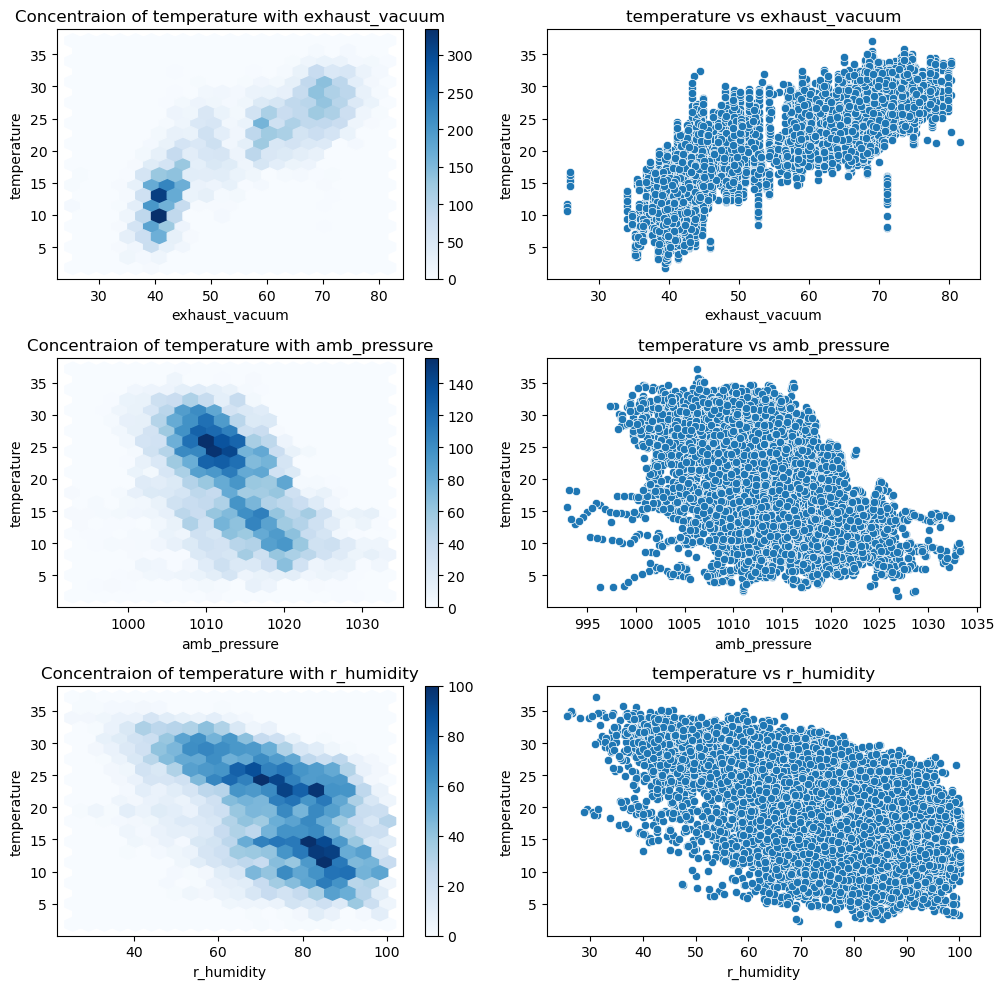

In [21]:
plt.figure(figsize =(10,10)) 
# plt.subplots(3,2, figsize =(10,10))
for j,i in enumerate(df.columns[1:-1]):
    plt.subplot(3,2,(2*j)+1)
    hb = plt.hexbin(df[i], df['temperature'], gridsize=20,cmap='Blues')
    cb = plt.colorbar(hb)   
    plt.xlabel(i)
    plt.ylabel('temperature')
    plt.title(f"Concentraion of temperature with {i}")
    plt.subplot(3,2,(2*j)+2)
    sns.scatterplot(data =df , x =df[i], y=df["temperature"])
    plt.title(f"temperature vs {i}")
plt.tight_layout()

# `MODEL BUILDING AND EVALUATION ON RAW DATASET`

first we will pass the dataset without handiling the outliers, transforming columns, doing feature engineering to different models

In [22]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split , cross_val_score

In [62]:

X = df.drop("energy_production", axis = 1)
y = df['energy_production']

In [63]:
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size= 0.3,random_state=0)

In [64]:
def normalise(train , test):
    scalaer = StandardScaler()
    standard_train = scalaer.fit_transform(train)
    standard_test = scalaer.transform(test)
    
    scalaer = MinMaxScaler()
    MinMaxScaler_train = scalaer.fit_transform(train)
    MinMaxScaler_test = scalaer.transform(test)
    
    
    scalaer = RobustScaler()
    RobustScaler_train = scalaer.fit_transform(train)
    RobustScaler_test = scalaer.transform(test)
    
    return standard_train, standard_test, MinMaxScaler_train, MinMaxScaler_test, RobustScaler_train, RobustScaler_test 
    

In [65]:
(standard_train, standard_test, MinMaxScaler_train, MinMaxScaler_test, 
RobustScaler_train, RobustScaler_test ) = normalise(X_train, X_test)

In [66]:

def evaluate_regression_models(X1,X2 ,y1,y2, models):
    results_df = pd.DataFrame(index =models.keys(), columns= ['R2','MAE',
                                                   'MSE','CV'])
    for model_name, model in models.items():
        model.fit(X1, y1)
        y_pred = model.predict(X2)

        cv_scores = cross_val_score(model, X1, y1, cv=5, 
                                    scoring="neg_mean_squared_error")
        cv_mse_mean = -cv_scores.mean()


        r2 = r2_score(y2, y_pred)
        mae = mean_absolute_error(y2, y_pred)
        mse = mean_squared_error(y2, y_pred)


        results_df.loc[model_name,  'R2'] = r2
        results_df.loc[model_name, 'MAE'] = mae
        results_df.loc[model_name,  'MSE'] = mse
        results_df.loc[model_name,  'CV'] = cv_mse_mean




    return results_df


In [67]:
models_to_evaluate = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', seed=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN' : KNeighborsRegressor()
}


In [68]:
len(y_train)

6694

In [69]:

standard_scaled = evaluate_regression_models(standard_train[:,:3],standard_test[:,:3], y_train,y_test, 
                                     models=models_to_evaluate)
standard_scaled

,R2,MAE,MSE,CV
Linear Regression,0.920352,3.862375,23.09598,23.480182
Ridge Regression,0.920349,3.862516,23.096904,23.480183
Lasso Regression,0.915751,3.977286,24.430234,24.900405
Random Forest,0.962444,2.395038,10.890311,12.096237
SVR,0.939523,3.246718,17.536821,18.148399
XGBoost,0.966255,2.25517,9.785389,10.332773
Gradient Boosting,0.949201,2.972284,14.730438,15.293793
KNN,0.948526,2.807638,14.92637,15.5052


In [29]:

standard_scaled = evaluate_regression_models(standard_train[:,:3],standard_test[:,3], y_train,y_test, 
                                     models=models_to_evaluate)
standard_scaled

,R2,MAE,MSE,CV
Linear Regression,0.932038,3.572379,19.896825,21.170535
Ridge Regression,0.932034,3.572598,19.897844,21.170574
Lasso Regression,0.915116,4.023229,24.851034,25.554813
Random Forest,0.962867,2.403105,10.871126,12.773744
SVR,0.941215,3.184234,17.21023,18.055018
XGBoost,0.967967,2.213449,9.378079,11.84825
Gradient Boosting,0.949818,2.943955,14.691487,15.635651
KNN,0.950575,2.794088,14.46991,16.492488


In [30]:
minmax_scaled = evaluate_regression_models(MinMaxScaler_train,MinMaxScaler_test, y_train,y_test, 
                                     models=models_to_evaluate)
minmax_scaled

,R2,MAE,MSE,CV
Linear Regression,0.932038,3.572379,19.896825,21.170535
Ridge Regression,0.931931,3.577962,19.928073,21.186141
Lasso Regression,0.843288,5.554533,45.879679,46.189069
Random Forest,0.962881,2.402379,10.866993,12.774297
SVR,0.941541,3.174284,17.114556,17.999631
XGBoost,0.967967,2.213449,9.378079,11.84825
Gradient Boosting,0.949825,2.943788,14.68944,15.635064
KNN,0.951214,2.768054,14.282634,16.09552


In [56]:
robust_scaled = evaluate_regression_models(RobustScaler_train,RobustScaler_test, y_train,y_test, 
                                     models=models_to_evaluate)
robust_scaled

,R2,MAE,MSE,CV
Linear Regression,0.932038,3.572379,19.896825,21.170535
Ridge Regression,0.932029,3.572957,19.899341,21.170763
Lasso Regression,0.905815,4.256133,27.574051,28.369837
Random Forest,0.962836,2.404459,10.880234,12.787989
SVR,0.940277,3.218357,17.484708,18.227475
XGBoost,0.967967,2.213449,9.378079,11.84825
Gradient Boosting,0.949834,2.943487,14.686703,15.63729
knn,0.947941,2.889126,15.240837,17.003885


In [57]:
original = evaluate_regression_models(X_train,X_test, y_train,y_test, 
                                     models=models_to_evaluate)
original

,R2,MAE,MSE,CV
Linear Regression,0.932038,3.572379,19.896825,21.170535
Ridge Regression,0.932038,3.572383,19.896845,21.170535
Lasso Regression,0.931631,3.587224,20.015899,21.237341
Random Forest,0.962833,2.404574,10.881132,12.771093
SVR,0.335839,11.603275,194.442226,208.645629
XGBoost,0.967967,2.213449,9.378079,11.84825
Gradient Boosting,0.949835,2.943651,14.686453,15.636762
knn,0.945316,2.975705,16.009442,17.544337


standard scaler worked best for almost all the algorithms

# `FEATURE ENGINEERING`

In [33]:
import statsmodels.formula.api as smf
model1=smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',
               data=df).fit() 

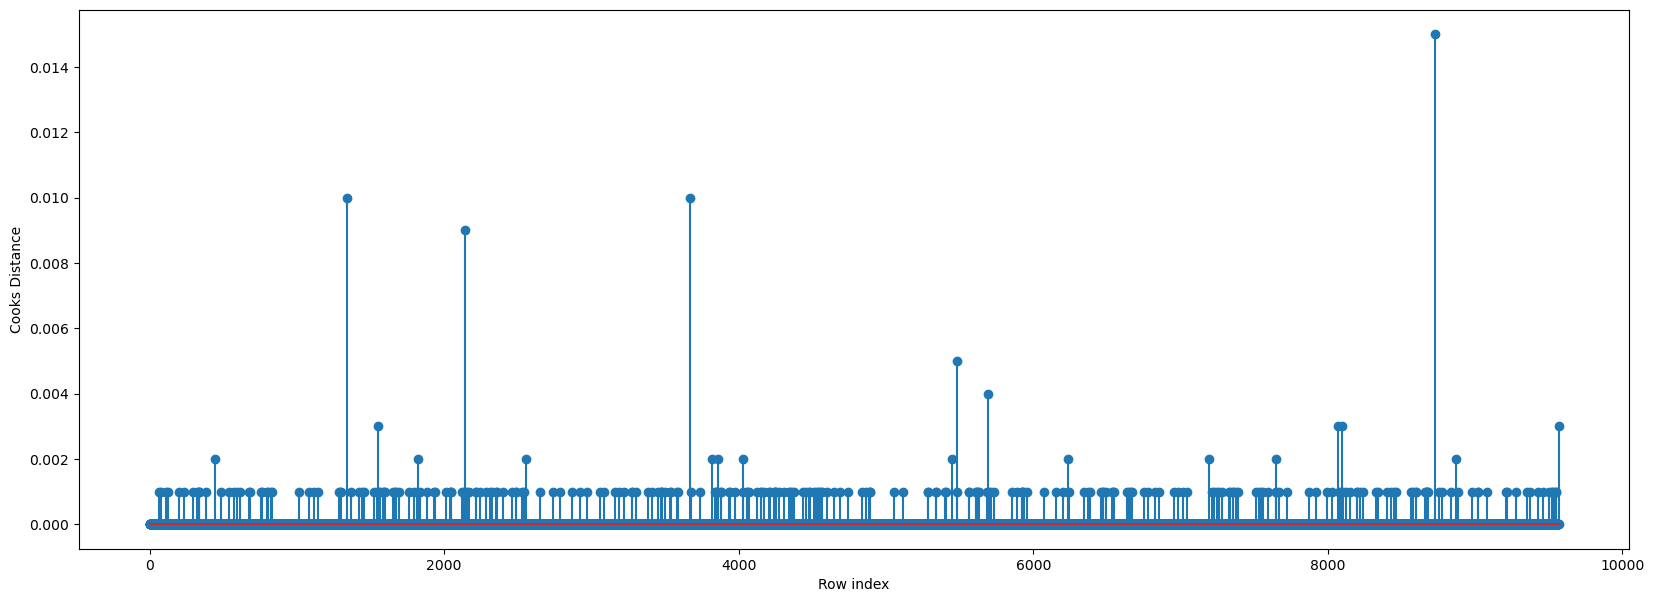

In [34]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model1.get_influence()                
(c, _) = model_influence.cooks_distance
fig=plt.subplots(figsize=(20,7))                #width=20 height=7 @fig
plt.stem(np.arange(len(df)), np.round(c,3)) #rounds array val to 3decimals
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

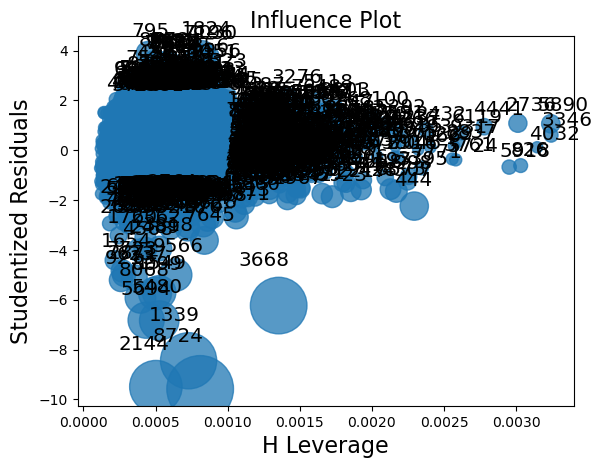

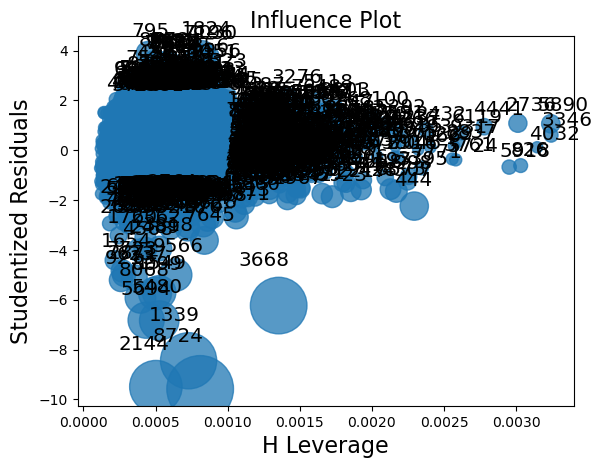

In [35]:
#Plotting Influence Plot
import statsmodels.api as sm
sm.graphics.influence_plot(model1)   

In [36]:
#display 1339,2144,3668,8724 index vals
df[df.index.isin([1339,2144,3668,8724])] 

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
1339,6.22,39.85,1012.05,86.88,443.73
2144,7.14,41.22,1016.60,97.09,435.58
3668,3.40,39.64,1011.10,83.43,459.86
8724,8.74,36.30,1015.18,61.97,438.63


In [37]:
#Dropping index (1339,2144,3668,8724)
df=df.drop([1339,2144,3668,8724], axis=0)
df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


now we will preprocess the data and then again train the models

In [59]:
process = power.copy() 

In [60]:
def handle_outliers(frame):
    for i in frame.columns:
        q3 = np.percentile(frame[i], 75)
        q1 = np.percentile(frame[i], 25)

        iqr = q3 - q1 

        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr

        frame[i] = np.where(frame[i] > upper, upper, np.where(frame[i] < lower, lower, frame[i]))

    return frame

In [62]:
for i in df.columns:
    handle_outliers(process)

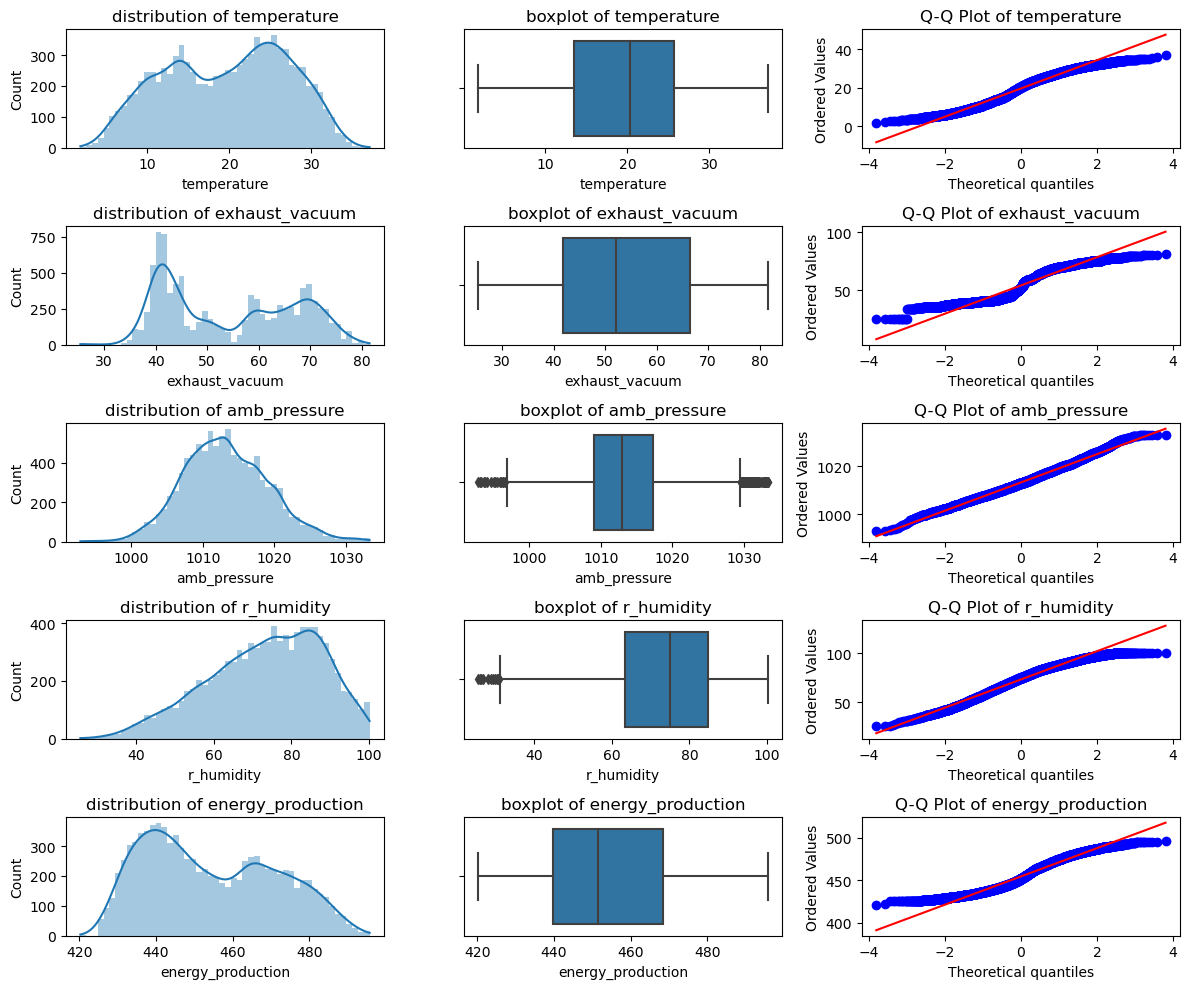

In [39]:
fig , ax = plt.subplots(5,3, figsize=(12,10), sharex =False, sharey =False)
for col_num ,col in enumerate(df.columns):
    sns.histplot( df[col] , ax = ax[col_num , 0], 
                 kde =True , bins = 50, alpha = 0.4, edgecolor = None)
    ax[col_num, 0].set_title(f"distribution of {col}")
    
    sns.boxplot(x = df[col] , ax = ax[col_num , 1])
    ax[col_num, 1].set_title(f"boxplot of {col}")
    
    probplot(df[col], plot=ax[col_num, 2], fit=True)
    ax[col_num, 2].set_title(f"Q-Q Plot of {col}")

plt.tight_layout()

In [40]:
X = df.drop(["energy_production"], axis =1 )
y = df["energy_production"]
X_train , X_test, y_train ,y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)
evaluate_regression_models(scaled_train, scaled_test ,  y_train, y_test, models=models_to_evaluate)

,R2,MAE,MSE,CV
Linear Regression,0.931535,3.608324,19.853324,20.320059
Ridge Regression,0.93153,3.60856,19.854578,20.320122
Lasso Regression,0.915941,3.972931,24.374972,24.838163
Random Forest,0.964006,2.359244,10.437434,11.59922
SVR,0.943207,3.131049,16.468658,17.307344
XGBoost,0.967906,2.217001,9.30659,10.166016
Gradient Boosting,0.951724,2.900107,13.998868,14.901828
KNN,0.950518,2.759376,14.34874,14.868271


In [69]:
standard_scaled

,R2,MAE,MSE,CV
Linear Regression,0.932038,3.572379,19.896825,21.170535
Ridge Regression,0.932034,3.572598,19.897844,21.170574
Lasso Regression,0.915116,4.023229,24.851034,25.554813
Random Forest,0.962867,2.403105,10.871126,12.773744
SVR,0.941215,3.184234,17.21023,18.055018
XGBoost,0.967967,2.213449,9.378079,11.84825
Gradient Boosting,0.949818,2.943955,14.691487,15.635651
knn,0.950575,2.794088,14.46991,16.492488


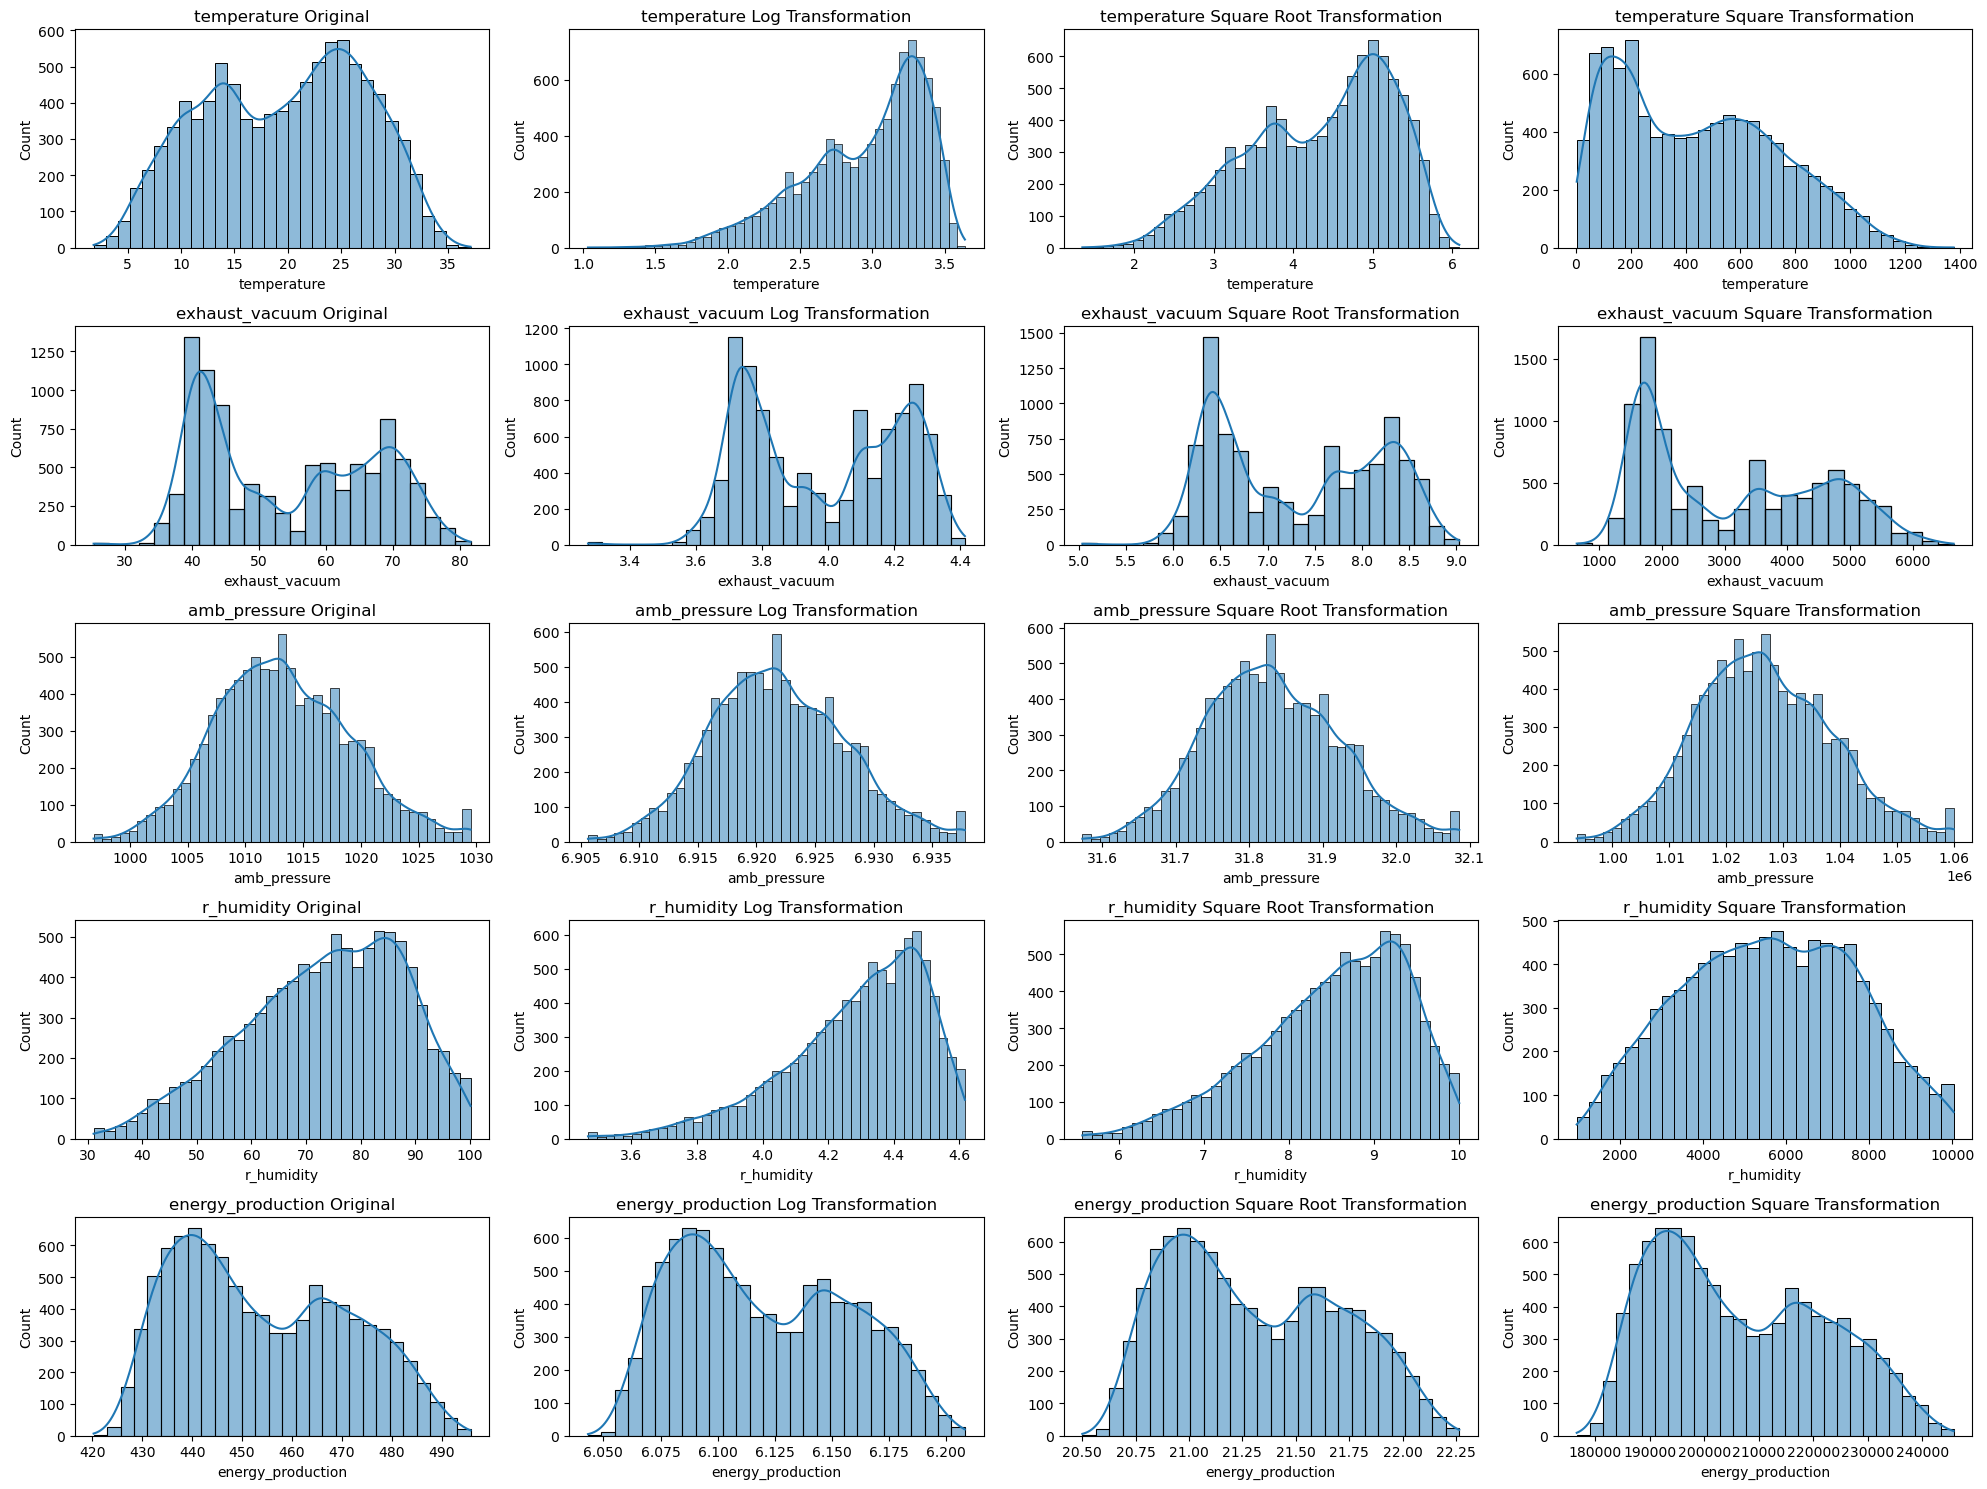

In [70]:

def plot_transformations(df):
    
    transformed_df = pd.DataFrame(index=df.index)

  
    fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))

    for i, col in enumerate(df.columns):
       
        sns.histplot(df[col], kde=True, ax=ax[i, 0])
        ax[i, 0].set_title(f"{col} Original")

        
        log_transformed = np.log1p(df[col])
        transformed_df[f"{col}_log"] = log_transformed
        sns.histplot(log_transformed, kde=True, ax=ax[i, 1])
        ax[i, 1].set_title(f"{col} Log Transformation")

    
        sqrt_transformed = np.sqrt(df[col])
        transformed_df[f"{col}_sqrt"] = sqrt_transformed
        sns.histplot(sqrt_transformed, kde=True, ax=ax[i, 2])
        ax[i, 2].set_title(f"{col} Square Root Transformation")

        
        square_transformed = np.square(df[col])
        transformed_df[f"{col}_square"] = square_transformed
        sns.histplot(square_transformed, kde=True, ax=ax[i, 3])
        ax[i, 3].set_title(f"{col} Square Transformation")



    plt.tight_layout()
    return transformed_df


transformed_data = plot_transformations(process)
plt.show()


from this we can see that
- temperature column does not require any transformation
- exhaust_vaccum column we can use log transform
- amb_pressure no transformation 
- r_humidiy square transformation can be applied
- energy_prduction no transformation required

In [71]:
def log_transform(X):
    X["exhaust_vacuum"] = np.log1p(X['exhaust_vacuum'])
    return X

def square_transform(X):
    X['r_humidity'] = np.square(X['r_humidity']) 
    return X

In [72]:
df = log_transform(process)
df = square_transform(process)

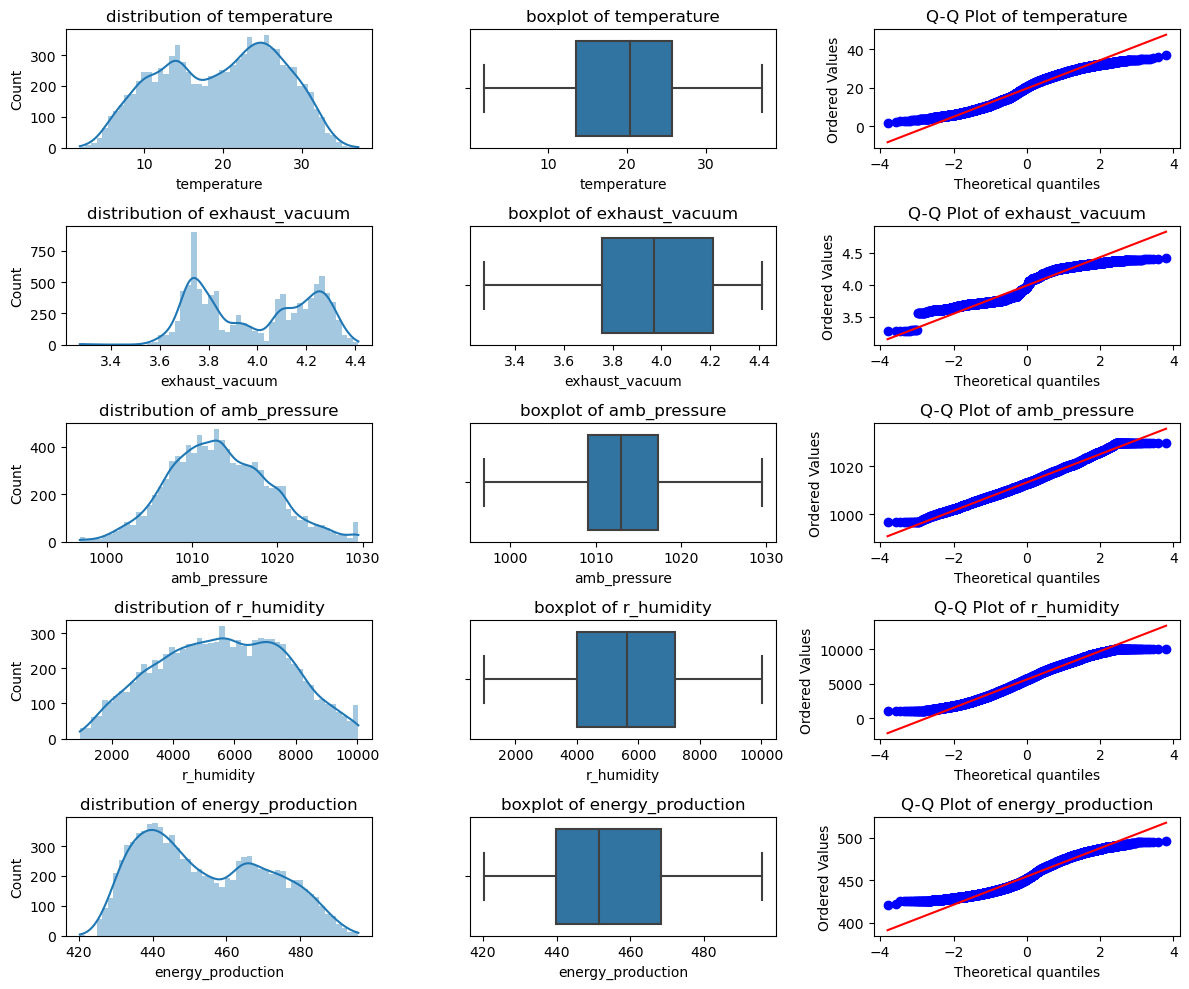

In [73]:
fig , ax = plt.subplots(5,3, figsize=(12,10), sharex =False, sharey =False)
for col_num ,col in enumerate(df.columns):
    sns.histplot( df[col] , ax = ax[col_num , 0], 
                 kde =True , bins = 50, alpha = 0.4, edgecolor = None)
    ax[col_num, 0].set_title(f"distribution of {col}")
    
    sns.boxplot(x = df[col] , ax = ax[col_num , 1])
    ax[col_num, 1].set_title(f"boxplot of {col}")
    
    probplot(df[col], plot=ax[col_num, 2], fit=True)
    ax[col_num, 2].set_title(f"Q-Q Plot of {col}")

plt.tight_layout()

In [74]:
X = process.drop(["energy_production"], axis =1 )
y = process["energy_production"]
X_train , X_test, y_train ,y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)
evaluate_regression_models(scaled_train, scaled_test ,  y_train, y_test, models=models_to_evaluate)

,R2,MAE,MSE,CV
Linear Regression,0.931887,3.563107,19.941005,21.024652
Ridge Regression,0.931883,3.563319,19.942191,21.024688
Lasso Regression,0.916376,3.984727,24.482049,25.057247
Random Forest,0.962885,2.400361,10.865944,12.782663
SVR,0.941284,3.181978,17.189795,17.962372
XGBoost,0.967621,2.235683,9.47926,12.0091
Gradient Boosting,0.950114,2.936996,14.604909,15.640595
knn,0.949294,2.838414,14.844914,16.414299


In [51]:
from sklearn.tree import DecisionTreeRegressor
evaluate_regression_models(X_train.iloc[:,:3], X_test.iloc[:,:3] ,  y_train, y_test, 
                           models={'Decision Trees':DecisionTreeRegressor(max_depth=1000),
                                  "random forest" : RandomForestRegressor(max_depth=1000),
                                  'XGBoost': XGBRegressor(objective='reg:squarederror', seed=42),
                                  'Gradient Boosting': GradientBoostingRegressor(random_state=42),})

,R2,MAE,MSE,CV
Decision Trees,0.934714,3.018045,18.93133,22.758139
random forest,0.962265,2.405267,10.942345,12.123683
XGBoost,0.966255,2.25517,9.785389,10.332773
Gradient Boosting,0.9492,2.972382,14.730795,15.293628


In [47]:
dt = RandomForestRegressor()
dt.fit(X,y)

RandomForestRegressor()

In [48]:
r2_score(dt.predict(X_test),y_test)

0.9953774274494641

In [75]:
standard_scaled

,R2,MAE,MSE,CV
Linear Regression,0.932038,3.572379,19.896825,21.170535
Ridge Regression,0.932034,3.572598,19.897844,21.170574
Lasso Regression,0.915116,4.023229,24.851034,25.554813
Random Forest,0.962867,2.403105,10.871126,12.773744
SVR,0.941215,3.184234,17.21023,18.055018
XGBoost,0.967967,2.213449,9.378079,11.84825
Gradient Boosting,0.949818,2.943955,14.691487,15.635651
knn,0.950575,2.794088,14.46991,16.492488


In [50]:
X_train.iloc[:,:3]

,temperature,exhaust_vacuum,amb_pressure
6060,24.58,71.94,1006.85
1831,31.56,66.44,1008.91
912,22.44,58.16,1017.28
8044,21.11,58.12,1015.38
4628,19.62,68.63,1012.26
...,...,...,...
7894,15.90,39.99,1007.03
9229,22.61,44.05,1005.69
4862,22.72,69.84,1005.96
3266,14.85,39.39,1013.93


- except gradint boosting no other algo performeed after column transformation compared to without transformation
- but the cross val score which took meetric as negatove mean square error was low after the transformation of the columns compared to before the models after transforming were slightly consistent than before transformation

# `MODEL BUILDING AND EVALUATING ON DATASE AFTER FEATURE ENGINEERING`

In [25]:
X1 = df.drop("energy_production", axis = 1)
y1 = df['energy_production']

In [26]:
results1 = evaluate_regression_models(X1, y1, models=models_to_evaluate)
results1

Standard Scaler                                         \
                         R2 Score Mean Absolute Error Mean Squared Error   
Linear Regression          0.9301            3.603058          20.423527   
Ridge Regression         0.930097            3.603202          20.424335   
Lasso Regression           0.9146            3.989335           24.95235   
Random Forest            0.962026            2.366679          11.095251   
SVR                      0.941962            3.118705          16.957536   
XGBoost                  0.965151            2.266298          10.182354   
Gradient Boosting         0.94832            2.933517          15.099979   

                  Min-Max Scaler                                         \
                        R2 Score Mean Absolute Error Mean Squared Error   
Linear Regression         0.9301            3.603058          20.423527   
Ridge Regression         0.93001            3.606768          20.449762   
Lasso Regression        0.826163            5.850361           50.79208   
Random Forest           0.962043            2.365275          11.090422   
SVR                     0.941531            3.129466          17.083497   
XGBoost                 0.965151            2.266298          10.182354   
Gradient Boosting        0.94832            2.933424          15.099903   

                  Robust Scaler                                         \
                       R2 Score Mean Absolute Error Mean Squared Error   
Linear Regression        0.9301            3.603058          20.423527   
Ridge Regression       0.930093            3.603436          20.425486   
Lasso Regression       0.903796             4.25192          28.108954   
Random Forest           0.96198            2.368874          11.108801   
SVR                    0.941498            3.137896          17.093334   
XGBoost                0.965151            2.266298          10.182354   
Gradient Boosting      0.948316            2.933791             15.101   

                  Standard Scaler  Min-Max Scaler   Robust Scaler  
                  Cross-Val Score Cross-Val Score Cross-Val Score  
Linear Regression       20.862788       20.862788       20.862788  
Ridge Regression        20.862810       20.878054       20.862951  
Lasso Regression        25.009617       49.723628       28.028941  
Random Forest           12.133341       12.129965       12.137146  
SVR                     17.945782       18.027658       18.087021  
XGBoost                 11.510384       11.510384       11.510384  
Gradient Boosting       15.244111       15.246163       15.245461

In [27]:
results

Standard Scaler                                         \
                         R2 Score Mean Absolute Error Mean Squared Error   
Linear Regression        0.929727             3.62022          20.532645   
Ridge Regression         0.929724            3.620379          20.533353   
Lasso Regression         0.913066            4.030631          25.400646   
Random Forest            0.962027            2.366385          11.095042   
SVR                      0.941443            3.132721          17.109352   
XGBoost                  0.966352            2.220298           9.831395   
Gradient Boosting        0.948092            2.942359          15.166539   

                  Min-Max Scaler                                         \
                        R2 Score Mean Absolute Error Mean Squared Error   
Linear Regression       0.929727             3.62022          20.532645   
Ridge Regression        0.929636            3.624191          20.559165   
Lasso Regression        0.833213             5.69356          48.732193   
Random Forest           0.961993            2.367305          11.105106   
SVR                     0.941533            3.123171          17.083087   
XGBoost                 0.966352            2.220298           9.831395   
Gradient Boosting       0.948092            2.942359          15.166539   

                  Robust Scaler                                         \
                       R2 Score Mean Absolute Error Mean Squared Error   
Linear Regression      0.929727             3.62022          20.532645   
Ridge Regression        0.92972            3.620631          20.534432   
Lasso Regression         0.9028            4.278387          28.400215   
Random Forest          0.961969            2.369054          11.111955   
SVR                    0.940693            3.159653          17.328479   
XGBoost                0.966352            2.220298           9.831395   
Gradient Boosting      0.948089            2.942673           15.16754   

                  Standard Scaler  Min-Max Scaler   Robust Scaler  
                  Cross-Val Score Cross-Val Score Cross-Val Score  
Linear Regression       20.940177       20.940177       20.940177  
Ridge Regression        20.940197       20.957858       20.940349  
Lasso Regression        25.384521       47.703851       28.302391  
Random Forest           12.129667       12.128189       12.134333  
SVR                     17.999058       17.962312       18.165066  
XGBoost                 11.302267       11.302267       11.302267  
Gradient Boosting       15.194778       15.192945       15.192164

after comapring the results of different algorithmn and comaprig the results after before and after  transformation we found that 
-  the results are slightly improved  after transformation

- scaling has no significant effect on the results.

- among all the algorithms Xgboost and RandomForest performed well

# `HYPERPARAMETER TUNING`

now we will try hyperparameter tuning on xgBoost

In [76]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
X = process.drop(["energy_production"], axis =1 )
y = process["energy_production"]
X_train , X_test, y_train ,y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)
evaluate_regression_models(scaled_train, scaled_test ,  y_train, y_test, models=models_to_evaluate)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
sc = StandardScaler() 
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)

In [77]:
xg_reg = XGBRegressor(objective ='reg:squarederror', seed = 42)

In [78]:
param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'alpha': [1, 5, 10]
}

In [79]:
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(scaled_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'alpha': [1, 5, 10], 'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error')

In [80]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 10, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [81]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(scaled_test)

In [82]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 10.627515711407048


In [83]:
models_to_evaluate = {
    'XGBoost': XGBRegressor(objective='reg:squarederror', seed=42,
                           alpha = 10,colsample_bytree= 0.7,learning_rate = 0.1,
                           max_depth= 7, n_estimators= 200),
    
}

In [84]:
results3 = evaluate_regression_models(scaled_train,scaled_test ,y_train,y_test ,
                                      models=models_to_evaluate)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1263472459.py, line 1)

In [39]:
results3

Standard Scaler                                        Min-Max Scaler  \
               R2 Score Mean Absolute Error Mean Squared Error       R2 Score   
XGBoost        0.960034            2.506192          11.677439       0.960034   

                                               Robust Scaler  \
        Mean Absolute Error Mean Squared Error      R2 Score   
XGBoost            2.506192          11.677439      0.960034   

                                               Standard Scaler  \
        Mean Absolute Error Mean Squared Error Cross-Val Score   
XGBoost            2.506192          11.677439       12.631002   

         Min-Max Scaler   Robust Scaler  
        Cross-Val Score Cross-Val Score  
XGBoost       12.631002       12.631002

# `FINAL MODEL BUILDING IN PIPELINE`

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [41]:
final_df = power.copy()

In [42]:
final_df = final_df.drop_duplicates()

In [43]:
def preprosessor(frame):
    
    for i in frame.columns:
        q3 = np.percentile(frame[i], 75)
        q1 = np.percentile(frame[i], 25)

        iqr = q3 - q1 

        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr

    frame[i] = np.where(frame[i] > upper, upper, np.where(frame[i] < lower, lower, frame[i]))

    frame["exhaust_vacuum"] = np.log1p(frame['exhaust_vacuum'])

    frame['r_humidity'] = np.square(frame['r_humidity']) 
        
    return frame
   

In [44]:
preprosessor(final_df)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,3.677819,1017.01,3612.0100,481.30
1,12.04,3.769076,1019.72,8962.4089,465.36
2,13.87,3.830379,1024.42,6673.2561,465.48
3,13.72,4.012773,1017.89,6253.6464,467.05
4,15.14,3.924742,1023.78,5625.0000,463.58
...,...,...,...,...,...
9563,17.10,3.925729,1005.53,6694.5124,457.32
9564,24.73,4.194793,1015.42,2787.8400,446.92
9565,30.44,4.047253,1005.19,3162.9376,429.34
9566,23.00,4.205439,1020.61,6446.4841,421.57


In [45]:
preprocessor_step = FunctionTransformer(preprosessor, validate=False)

In [46]:
xgb_model = XGBRegressor(objective='reg:squarederror', seed=42,
                           alpha = 10,colsample_bytree= 0.7,learning_rate = 0.1,
                           max_depth= 7, n_estimators= 200)

In [47]:
X_final = final_df.iloc[:,:-1]
y_final = final_df.iloc[:,-1]

In [48]:
X_train, X_test, y_train, y_test =train_test_split(X_final, y_final,test_size=0.3, random_state=42)

In [49]:
pipe = Pipeline([
    ('preprocessor',preprocessor_step),
    ('Scaling', StandardScaler()),
    ('model', xgb_model)    
])

In [50]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 FunctionTransformer(func=<function preprosessor at 0x0000019D1ED30D60>)),
                ('Scaling', StandardScaler()),
                ('model',
                 XGBRegressor(alpha=10, base_score=None, booster=None,
                              callbacks=None, colsample_bylevel=None,
                              colsample_bynode=None, colsample_bytree=0.7,
                              device=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [51]:
r2_score(pipe.predict(X_test), y_test)

0.9570215795079848

In [52]:
import pickle

In [53]:
# pickle.dump(pipe, open("model_pipe.pkl","wb"))

In [54]:
# pickle.dump(preprosessor, open("preprocessor.pkl","wb"))

In [55]:
import sklearn
print(sklearn.__version__)

1.2.2


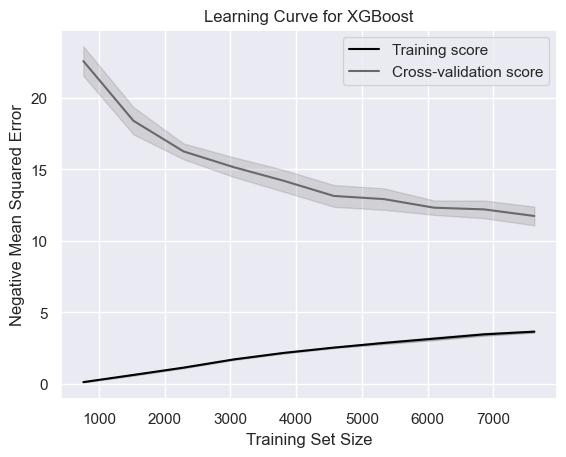

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor

# Assuming X and y are your feature and target data
train_sizes, train_scores, test_scores = learning_curve(
    XGBRegressor(objective='reg:squarederror', seed=42,
                           alpha = 0.01,colsample_bytree= 0.7,learning_rate = 0.1,
                           max_depth= 7, n_estimators= 200),
    X_final, y_final, cv=5, scoring="neg_mean_squared_error", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score", color="black")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="black")

plt.plot(train_sizes, test_mean, label="Cross-validation score", color="dimgrey")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="dimgrey")

plt.xlabel("Training Set Size")
plt.ylabel("Negative Mean Squared Error")
plt.title("Learning Curve for XGBoost")
plt.legend(loc="best")
plt.show()


In [1]:
input_data = [["temperature", "exhaust_vacuum", "amb_pressure", "r_humidity"]]

In [2]:
input_data

[['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']]

In [4]:
for i in input_data[0]:
    print(i)

temperature
exhaust_vacuum
amb_pressure
r_humidity


In [1]:
import xgboost
print(xgboost.__version__)

2.0.3
